# Lorenz63 density levels

In [1]:
# 12 minutes on mba m1...
using Pkg
Pkg.activate("../env/.")
Pkg.instantiate()
Pkg.add("WebIO")
Pkg.add("NPZ")
Pkg.add("Distances")

include("../src/Eirene_var.jl")
include("../src/analogous_bars.jl")

#using .Eirene_var
#using .analogous_bars

  Activating project at `~/Documents/research/analogous_bars_neural/env`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/research/analogous_bars_neural/env/Project.toml`
  No Changes to `~/Documents/research/analogous_bars_neural/env/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Documents/research/analogous_bars_neural/env/Project.toml`
  No Changes to `~/Documents/research/analogous_bars_neural/env/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Documents/research/analogous_bars_neural/env/Project.toml`
  No Changes to `~/Documents/research/analogous_bars_neural/env/Manifest.toml`
[ Info: Precompiling Blink [ad839575-38b3-5650-b840-f874b8c74a25]


WebIO._IJuliaInit()

[ Info: Precompiling MultivariateStats [6f286f6a-111f-5878-ab1e-185364afe411]
Precompiling JLD
  ✓ HDF5_jll
  ✓ HDF5
  ✓ H5Zblosc
  ✓ JLD
  4 dependencies successfully precompiled in 18 seconds. 27 already precompiled.
[ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
┌ Warning: Module OpenSSL_jll with build ID fafbfcfd-dd4e-5ad1-000f-00fe2a025a2b is missing from the cache.
│ This may mean OpenSSL_jll [458c3c95-2e84-50aa-8efc-19380b2a3a95] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8].
[ Info: Precompiling HDF5 [f67ccb44-e63f-5c2f-98bd-6dc0ccc4ba2f]
┌ Warning: Module OpenSSL_jll with build ID fafbfcfd-dd4e-5ad1-000f-00fe2a025a2b is missing from the cache.
│ This may mean OpenSSL_jll [458c3c95-2e84-50aa-8efc-19380b2a3a95] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:

Main.analogous_bars

# 1. Load data 

In [2]:
# testing for composing analogous bars
# P = densest 50%, Q = densest 60%, T = densest 70%



#pwd()
using NPZ
#data = npzread("../data/lorenz_10k_raw.npy")

P = npzread("../data/densest60.npy")
Q = npzread("../data/densest65.npy")
T = npzread("../data/densest70.npy")

D_P = npzread("../data/dist_mid.npy")
D_Q = npzread("../data/dist_int.npy")
D_T = npzread("../data/dist_low.npy")

D_P_Q = npzread("../data/dist_midint.npy")
D_Q_T = npzread("../data/dist_intlow.npy")
D_P_T = npzread("../data/dist_midlow.npy")

D_Q_P = transpose(D_P_Q)
D_T_Q = transpose(D_Q_T)
D_T_P = transpose(D_P_T)

n_small = 120
n_mid = 130
n_large = 140

#n_small, _ = 60
#n_large, _ = 70


# First, make sure to import the CSV package
#using JLD

# Now you can load a CSV file
#data = CSV.File("path/to/your/file.csv")  # Replace with your file path

140

In [3]:
# composing analogous bar
# Compute Vietoris-Rips persistence on two regions
using .Eirene_var

dim = 1
VR_P = eirene(D_P, record = "all", maxdim = dim)
VR_Q = eirene(D_Q, record = "all", maxdim = dim)
VR_T = eirene(D_T, record = "all", maxdim = dim)

# compute Witness persistence
#W_P = compute_Witness_persistence(D_P_Q, maxdim = dim);

Dict{String, Any} with 21 entries:
  "symmat"   => [6863 6746 … 0 0; 6746 6863 … 0 0; … ; 0 0 … 6863 6479; 0 0 … 6…
  "Lrv"      => [Int64[], [71, 140, 136, 140, 136, 140, 108, 138, 140, 72  …  1…
  "maxnz"    => [0, 3675, 79667, 1, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  132, 133, 134, 135, 136, 13…
  "cyclerep" => [Vector{Int64}[], [[2, 3], [32, 36], [32, 29], [130, 129], [46,…
  "trv"      => [Int64[], [39, 23, 3, 55, 48, 140, 137, 136, 30, 10  …  131, 13…
  "phi"      => [Int64[], [123, 3392, 3107, 6797, 4535, 5410, 4666, 4155, 1302,…
  "plo"      => [Int64[], [3, 36, 29, 129, 48, 61, 55, 41, 12, 86  …  114, 35, …
  "ocg2rad"  => [20.8973, 20.8972, 20.8963, 20.895, 20.8923, 20.8896, 20.8887, …
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  131, 132, 133, 134, 135, 13…
  "Lirv"     => [Int64[], [71, 136, 136, 108, 72, 114, 72, 135, 128, 109  …  13…
  "Rcp"      => [[1], [1, 1, 1, 1, 1, 1, 1, 2, 2, 2  …  141, 144, 152, 163, 170…
  "prepairs" => [Int64[], Int64[], 

In [4]:
# composing analogous bar
# compute Witness persistence
using .analogous_bars
W_P_Q = compute_Witness_persistence(D_P_Q, maxdim = dim); #midint
W_Q_T = compute_Witness_persistence(D_Q_T, maxdim = dim); #intlow
W_P_T = compute_Witness_persistence(D_P_T, maxdim = dim); #midlow

barcode_W_P_Q = barcode(W_P_Q["eirene_output"], dim = 1)
barcode_W_Q_T = barcode(W_Q_T["eirene_output"], dim = 1)
barcode_W_P_T = barcode(W_P_T["eirene_output"], dim = 1)

3×2 Matrix{Float64}:
 6.10196   6.38151
 9.84788  15.0234
 2.37271   2.43996

In [5]:
# composing analogous bar
# plot all PD
barcode_VR_P = barcode(VR_P, dim = 1)
#barcode_W_P = barcode(W_P["eirene_output"], dim = 1)
barcode_VR_Q = barcode(VR_Q, dim = 1);
barcode_VR_T = barcode(VR_T, dim = 1);

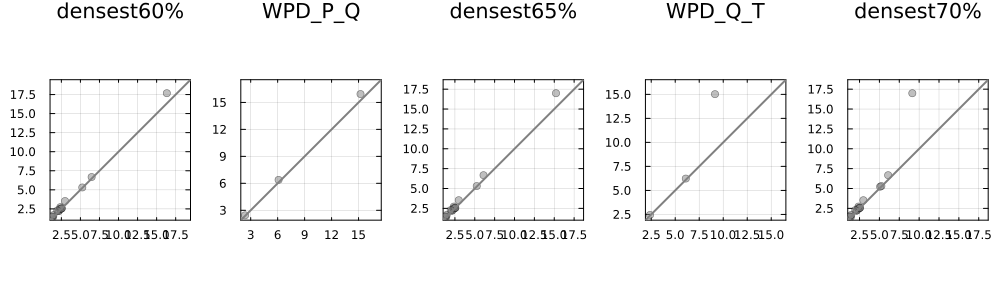

In [8]:
# composing analogous bar
# plot all PD P, Q, T
using Plots

selected_P, cutoff_P = select_persistent_intervals_IQR(barcode_VR_P)
p1 = plot_PD(barcode_VR_P, title = "densest60%")
p2 = plot_PD(barcode_W_P_Q, title = "WPD_P_Q")
p3 = plot_PD(barcode_VR_Q, title = "densest65%")
p4 = plot_PD(barcode_W_Q_T, title = "WPD_Q_T")
p5 = plot_PD(barcode_VR_T, title = "densest70%")
plot(p1, p2, p3, p4, p5, layout = grid(1,5), size = (1000, 300))

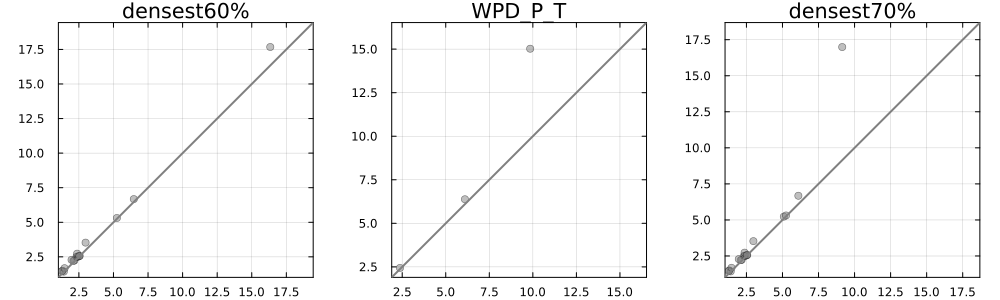

In [9]:
# composing analogous bar
# plot PD from P to T
using Plots

p1 = plot_PD(barcode_VR_P, title = "densest60%")
p2 = plot_PD(barcode_W_P_T, title = "WPD_P_T")
p3 = plot_PD(barcode_VR_T, title = "densest70%")
plot(p1, p2, p3, layout = grid(1,3), size = (1000, 300))

In [21]:
selected_P

Int64[]

# Compute analogous cycles

In [15]:
# composing analogous bars
# P, T analogous bars

using .analogous_bars

analogous_P, analogous_T = run_baseline_similarity_analogous(;
                                                                VR_P = VR_P,
                                                                D_P = D_P, 
                                                                VR_Q = VR_T,
                                                                D_Q = D_T, 
                                                                W_PQ = W_P_T, 
                                                                W_PQ_bars = [4]);
# 2 ==> 16,17 

# Organize output 
analogous_P_significant, analogous_T_significant = analogous_cycles_significant(analogous_P, analogous_T, significant_P = selected_P)

# print results
for k in keys(analogous_P_significant)
    println("*** Printing analogous pair *** ")
    println("In P: ", analogous_P_significant[k])
    println("In T: ", analogous_T_significant[k])
end 

LoadError: BoundsError: attempt to access 3×2 Matrix{Float64} at index [[4], 2]

In [19]:
# composing analogous bars
# P, Q analogous bars

using .analogous_bars

analogous_P, analogous_Q = run_baseline_similarity_analogous(;
                                                                VR_P = VR_P,
                                                                D_P = D_P, 
                                                                VR_Q = VR_Q,
                                                                D_Q = D_Q, 
                                                                W_PQ = W_P_Q, 
                                                                W_PQ_bars = [4]);
# 2 ==> 16,16

# Organize output 
analogous_P_significant, analogous_Q_significant = analogous_cycles_significant(analogous_P, analogous_Q, significant_P = selected_P)

# print results
for k in keys(analogous_P_significant)
    println("*** Printing analogous pair *** ")
    println("In P: ", analogous_P_significant[k])
    println("In Q: ", analogous_Q_significant[k])
end 

LoadError: BoundsError: attempt to access 3×2 Matrix{Float64} at index [[4], 2]

In [23]:
# composing analogous bars
# Q, T analogous bars

using .analogous_bars
selected_Q, cutoff_Q = select_persistent_intervals_IQR(barcode_VR_Q)
analogous_Q, analogous_T = run_baseline_similarity_analogous(;
                                                                VR_P = VR_Q,
                                                                D_P = D_Q, 
                                                                VR_Q = VR_T,
                                                                D_Q = D_T, 
                                                                W_PQ = W_Q_T, 
                                                                W_PQ_bars = [4]);
# 2 ==> 16,17

# Organize output 
analogous_Q_significant, analogous_T_significant = analogous_cycles_significant(analogous_Q, analogous_T, significant_P = selected_Q)

# print results
for k in keys(analogous_Q_significant)
    println("*** Printing analogous pair *** ")
    println("In Q: ", analogous_Q_significant[k])
    println("In T: ", analogous_T_significant[k])
end 

LoadError: BoundsError: attempt to access 3×2 Matrix{Float64} at index [[4], 2]

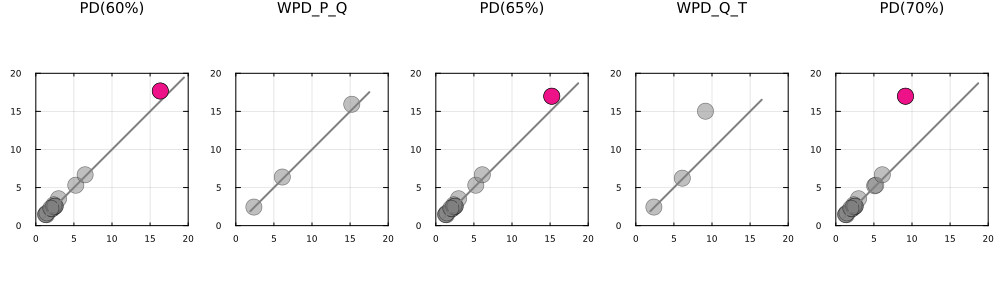

In [24]:
# composing analogous bars
# plot all persistence diagrams & significance feature cutoff
p1 = plot_PD(barcode_VR_P; 
            highlight = [16],
            title = "PD(60%)", 
            titlefontsize = 10,
            tickfontsize = 6,
            markersize = 9,
            xlims = (0,20),
            ylims = (0,20))

p2 = plot_PD(barcode_W_P_Q; 
            #highlight = [2],
            title = "WPD_P_Q", 
             markersize = 9,
            tickfontsize = 6,
            titlefontsize = 10,
            xlims = (0,20),
            ylims = (0,20))

p3 = plot_PD(barcode_VR_Q; 
            highlight = [16],
            title = "PD(65%)", 
             markersize = 9,
            tickfontsize = 6,
            titlefontsize = 10,
            xlims = (0,20),
            ylims = (0,20))

p4 = plot_PD(barcode_W_Q_T; 
            #highlight = [2],
            title = "WPD_Q_T", 
             markersize = 9,
            tickfontsize = 6,
            titlefontsize = 10,
            xlims = (0,20),
            ylims = (0,20))

p5 = plot_PD(barcode_VR_T; 
            highlight = [17],
            title = "PD(70%)", 
             markersize = 9,
            tickfontsize = 6,
            titlefontsize = 10,
            xlims = (0,20),
            ylims = (0,20))

plot(p1, p2, p3, p4, p5, layout = grid(1,5), size = (1000, 300))
#savefig("data/annulus/analogous_cycles.pdf")

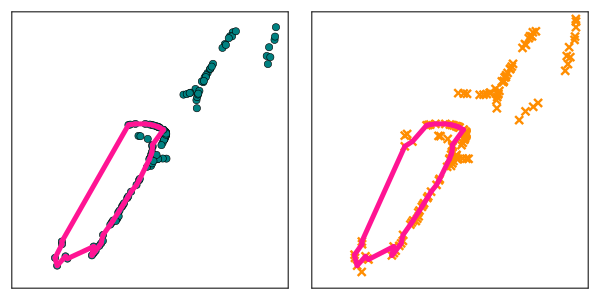

In [38]:
cr_P = get_cyclerep_Eirene(VR_P, 9)
cr_Q = get_cyclerep_Eirene(VR_Q, 11)

# plot cycles
p1 = plot_cycle_single(transpose(P), cycle = cr_P, c = "#008181", cycle_color = :deeppink)
p2 = plot_cycle_single(transpose(Q), cycle = cr_Q, c = "#ff8d00", marker = :xcross, 
                markerstrokewidth = 4, markersize = 4, cycle_color = :deeppink)
plot(p1, p2, layout = grid(1,2), size = (600, 300), xlims = (-20, 15), ylims = (-20, 15))
#savefig("data/annulus/analogous_cycles_rep.pdf")

In [ ]:
scatter3d(x_Rcoords, y_Rcoords, z_Rcoords, label="Entire Dataset", color=:green)